In [1]:
#IMPORT LIBRARIES

import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn

%matplotlib inline


# Data recuperation

In [2]:
data = pd.read_csv('C:/Users/Christine Rasi/proyek_dami/creditcard.csv') # read data dalam bentuk .csv
df = pd.DataFrame(data) # Convert data ke Dataframe
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Data Visualization

In [4]:
df.describe() # Deskripsi data menggunakan Fitur Statistik 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


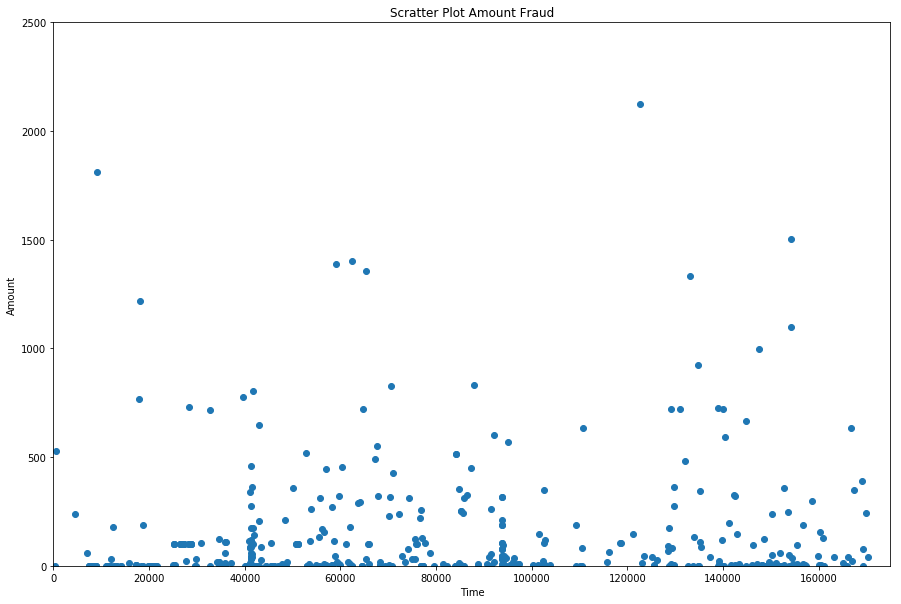

In [5]:
# Pulihkan fraud data
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,10))
# Tampilan jumlah fraud berdasarkan waktu
plt.scatter(df_fraud['Time'], df_fraud['Amount']) 
plt.title('Scratter Plot Amount Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [6]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] 
print('Terdapat '+str(nb_big_fraud) + ' penipuan dari 1000 data lebih yang diambil, dari ' + str(df_fraud.shape[0]) + ' penipuan asli')

Terdapat 9 penipuan dari 1000 data lebih yang diambil, dari 492 penipuan asli




Unbalanced data


In [7]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('Terdapat '+ str(number_fraud) + ' penipuan dalam dataset asli, sedangkan non-penipuan berjumlah  ' + str(number_no_fraud) +' dalam dataset.')

Terdapat 492 penipuan dalam dataset asli, sedangkan non-penipuan berjumlah  284315 dalam dataset.


Dataset ini tidak seimbang sehingga mengakibatkan terdapat kelakuan yang tidak diinginkan  dari pengawas classifier. Sehingga untuk memahaminya dengan mudah maka dilakukan train dataset untuk mengetahui keakuratan data untuk mendapatkan label tiap transaksi yang dilakukan apakah merupakan fraud atau non-fraud

In [8]:
print("Akurasi yang dihasilkan : "+ str((284315-492)/284315))

Akurasi yang dihasilkan : 0.998269524998681


# Correlation of features

In [9]:
df_corr = df.corr()

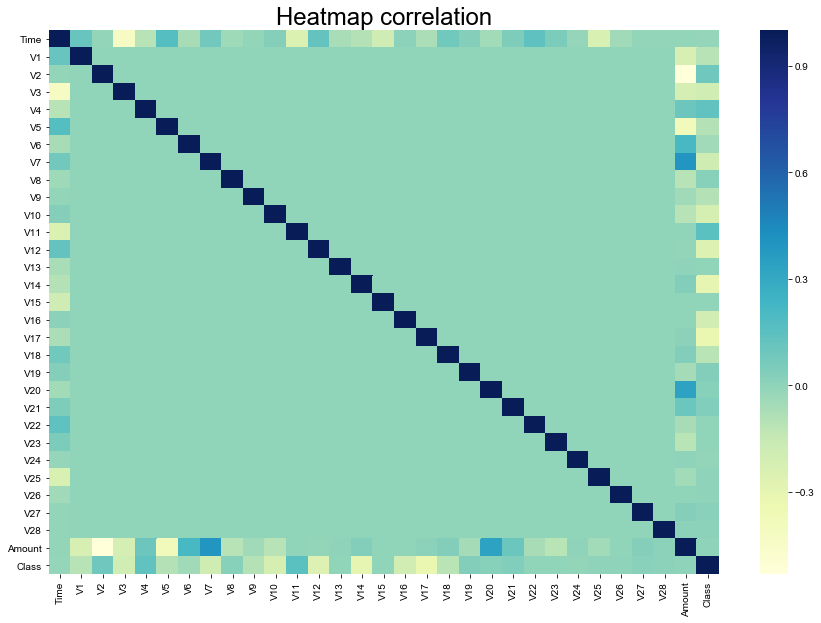

In [10]:
plt.figure(figsize=(15,10))

seaborn.heatmap(df_corr, cmap="YlGnBu") 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa sebagian besar fitur berkorelasi negatif. Untuk mengatasinya perlu dilakukan dimension reduction atau PCA

In [11]:
# Retrieving the correlation coefficients per feature in relation to the feature class
rank = df_corr['Class'] 
df_rank = pd.DataFrame(rank) 
 # Ranking the absolute values of the coefficients
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False)
# Removing Missing Data (not a number)                                                  
df_rank.dropna(inplace=True) 

# Data Selection

In [12]:
# Membagi data menjadi train dan test dataset

# train dataset
df_train_all = df[0:150000] # potong ke dalam 2 dataset original
# Bagi data menjadi data yang memiliki fraud dan no-fraud
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('Dalam dataset, memiliki ' + str(len(df_train_1)) +" frauds")

df_sample=df_train_0.sample(300)
# Gabungkan data fraud dengan no-fraud 
df_train = df_train_1.append(df_sample) 
# Gabungkan seluruh dataset
df_train = df_train.sample(frac=1) 

Dalam dataset, memiliki 293 frauds


In [13]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [14]:
#test dataset
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [15]:
X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

In [16]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [17]:
#Labeli Class=1 "fraud", 0="no fraud"
class_names=np.array(['0','1'])

In [18]:
# Fungsi Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection

Kami menggunakan SVM Model Classifier dengan scikit-learn library

In [19]:
#Set SVM default sebagai classifier
classifier = svm.SVC(kernel='linear')
#train model dengan train data yang seimbang
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Testing the model

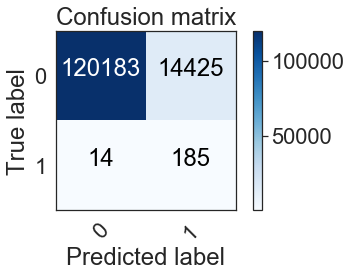

In [20]:
prediction_SVM_all = classifier.predict(X_test_all)
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

Hasil prediksi di atas menjelaskan bahwa kesalahan tentang actual fraud jauh lebih buruk daripada kesalahan pada transaksi non-fraud. Sehingga diperlukan akurasi sebagai standar klasifikasi.

In [21]:
print('Hasil akurasi standar   ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Hasil akurasi standar   0.9222968567048376


In [22]:
print('Terdeteksi sebanyak ' + str(cm[1][1]) + ' fraud  ' + str(cm[1][1]+cm[1][0]) + ' dari total fraud.')
print('\nJadi kemungkinan untuk mendeteksi satu fraud adalah ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Sehingga akurasi yang dihasilkan adalah : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Terdeteksi sebanyak 185 fraud  199 dari total fraud.

Jadi kemungkinan untuk mendeteksi satu fraud adalah 0.9296482412060302
Sehingga akurasi yang dihasilkan adalah : 0.8928913187000675


# Models Rank

Karena sebelumnya telah dilakukan dimension reduction dari 29 menjadi 10, maka perlu menghitung fit method lagi

In [23]:
classifier.fit(X_train_rank, y_train)
prediction_SVM = classifier.predict(X_test_all_rank)

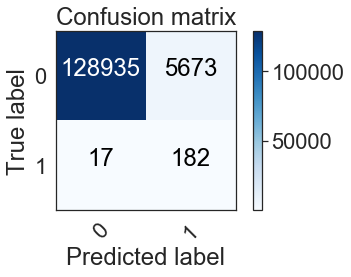

In [24]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [25]:
print('Hasil standar akurasi:  ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Hasil standar akurasi:  0.9232165933258838


In [26]:
print('Terdeteksi sebanyak ' + str(cm[1][1]) + ' fraud  ' + str(cm[1][1]+cm[1][0]) + ' dari total fraud.')
print('\nProbabiliti untuk mendeteksi satu fraud adalah ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Akurasinya yang dihasilkan : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Terdeteksi sebanyak 182 fraud  199 dari total fraud.

Probabiliti untuk mendeteksi satu fraud adalah 0.914572864321608
Akurasinya yang dihasilkan : 0.9577915093429866


Kesimpulannya:
Hasil data yang diperoleh lebih relevan dengan menggunakan reduction data sehingga langkah terakhir yang dilakukan dari PCA yang pada tahap awal dapat dilakukan dengan cara yang lebih efisien.

# Re-balanced class weigh :

Pada model SVM sebelumnya, bobot tiap kelas sama sehingga dapat dikatakan bahwa nilai fraud sama buruknya dengan salah menilai no-fraud. Tujuan yang diinginkan oleh pihak Bank adalah untuk memaksimalkan jumlah fraud yang terdeteksi, bahwa perlu juga mempertimbangkan lebih banyak tuple no-fraud sebagai operasi fraud. Sehingga diperlukan tuple untuk meminimalkan Positif Fraud sebagai jumlah fraud yang tidak terdeteksi.

Dengan memodifikasi parameter class_weight, perlu memilih class mana 
yang lebih penting pada tahap train data. Karena pada data dengan Class=0 yang lebih besar dan memungkinkan banyaknya kesalahan pada klasifikasi no-fraud sehingga memberikan nilai yang lebih penting. Dengan tujuan untuk menghilangkan fraud sesedikit mungkin

In [27]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [28]:
#train data
classifier_b.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 0.6, 1: 0.4}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

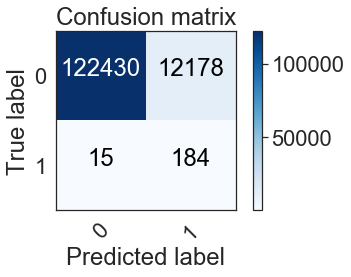

In [29]:
#test model
prediction_SVM_b_all = classifier_b.predict(X_test_all)
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [30]:
print('Hasil standar akurasi:  ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Hasil standar akurasi:  0.9216089273803796


In [31]:
print('Terdeteksi sebanyak ' + str(cm[1][1]) + ' fraud ' + str(cm[1][1]+cm[1][0]) + ' dari total fraud.')
print('\nProbabiliti untuk mendeteksi satu fraud adalah ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Akurasi yang dihasilkan adalah : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Terdeteksi sebanyak 184 fraud 199 dari total fraud.

Probabiliti untuk mendeteksi satu fraud adalah 0.9246231155778895
Akurasi yang dihasilkan adalah : 0.9095521745903402


In [32]:
#models Rank
classifier_b.fit(X_train_rank, y_train)
prediction_SVM = classifier_b.predict(X_test_all_rank)

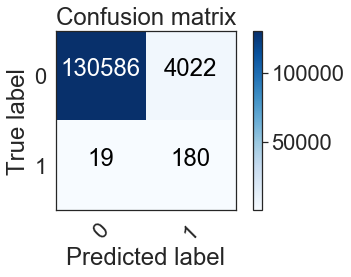

In [33]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [34]:
print('Hasil standar akurasi: ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Hasil standar akurasi: 0.9176228528162336


In [35]:
print('Terdeteksi sebanyak' + str(cm[1][1]) + ' fraud ' + str(cm[1][1]+cm[1][0]) + ' dari total frauds.')
print('\nJadi Probabiliti untuk mendeteksi satu fraud adalah ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Akurasi yang dihasilkan adalah : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Terdeteksi sebanyak180 fraud 199 dari total frauds.

Jadi Probabiliti untuk mendeteksi satu fraud adalah 0.9045226130653267
Akurasi yang dihasilkan adalah : 0.970023811819861
